In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msn
import datetime
from pandas_profiling import ProfileReport
import sklearn

In [3]:
df = pd.read_parquet("escooter_history_2022.parquet")

In [4]:
df.loc[df.temp > 50, "temp"] = df.temp.div(100)

In [ ]:
df.registered_customer

In [5]:
df = pd.get_dummies(df)

In [6]:
df_slice2 = df[df["registered_customer"] == False].copy()

In [7]:
df_slice2

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,registered_customer,"weather_clear, few clouds","weather_cloudy, mist",weather_heacy rain or thunderstorm or snow or ice pallets,weather_light snow or rain or thunderstorm
8,2020-01-04 00:31:22,0.0,0.0,9.84,14.395,81.0,0.0000,False,1,0,0,0
9,2020-01-04 00:35:10,0.0,0.0,9.84,14.395,81.0,0.0000,False,1,0,0,0
11,2020-01-04 00:42:24,0.0,0.0,9.84,14.395,81.0,0.0000,False,1,0,0,0
17,2020-01-04 01:00:14,0.0,0.0,9.02,13.635,80.0,0.0000,False,1,0,0,0
24,2020-01-04 01:11:21,0.0,0.0,9.02,13.635,80.0,0.0000,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3755333,2022-01-03 23:23:12,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0
3755334,2022-01-03 23:23:18,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0
3755352,2022-01-03 23:32:50,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0
3755353,2022-01-03 23:33:34,0.0,1.0,10.66,13.635,65.0,8.9981,False,1,0,0,0


In [21]:
df_slice3 = df_slice2.groupby(pd.Grouper(key="datetime",freq="min")).agg(Ausleihzahl=("registered_customer","count"),holiday=("holiday","mean"),workingday=("workingday","mean"),temp=("temp","mean"),atemp=("atemp","mean"),humidity=("humidity","mean"),windspeed=("windspeed","mean"),clear_few_clouds=("weather_clear, few clouds","mean"),cloudy_mist=("weather_cloudy, mist","mean"),heacy_rain_snow=("weather_heacy rain or thunderstorm or snow or ice pallets","mean"),light_snow_rain_thunderstorm=("weather_light snow or rain or thunderstorm","mean")).reset_index()

In [22]:
df_slice3

,datetime,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed
0,2020-01-04,331,0.0,0.00,16.868218,20.707251,79.021148,17.235598
1,2020-01-05,131,0.0,0.00,14.390687,16.683015,67.244275,16.198554
2,2020-01-06,120,0.0,1.00,9.129333,10.801792,36.758333,15.966826
3,2020-01-07,108,0.0,1.00,10.120926,12.107546,53.638889,14.749616
4,2020-01-08,82,0.0,1.00,10.390000,12.094573,35.390244,15.500532
...,...,...,...,...,...,...,...,...
726,2021-12-30,207,0.0,1.00,10.707536,11.604783,57.149758,24.556083
727,2021-12-31,515,0.0,1.00,10.741204,12.993058,56.588350,11.313828
728,2022-01-01,639,0.0,0.00,10.535524,12.120000,76.259781,7.836127
729,2022-01-02,790,0.0,0.00,10.913266,12.118557,46.292405,23.570295


In [17]:
df_slice3.dropna(inplace=True)


In [18]:
df_slice3[df_slice3.temp.isna()]

,datetime,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed


In [13]:
df_slice3.corr()

,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed,clear_few_clouds,cloudy_mist,heacy_rain_snow,light_snow_rain_thunderstorm
Ausleihzahl,1.000000,0.049289,-0.276423,0.196426,0.193954,-0.182470,0.038195,0.076204,-0.059101,-0.003408,-0.044008
holiday,0.049289,1.000000,-0.222676,-0.001151,-0.002640,0.024166,-0.024803,-0.004190,0.014983,-0.000934,-0.021381
workingday,-0.276423,-0.222676,1.000000,0.090494,0.084655,-0.036480,0.005545,-0.024573,0.026440,0.000789,-0.000793
temp,0.196426,-0.001151,0.090494,1.000000,0.979190,-0.149385,-0.015625,0.139010,-0.120023,-0.012076,-0.055337
atemp,0.193954,-0.002640,0.084655,0.979190,1.000000,-0.119190,-0.036169,0.135408,-0.115745,-0.012124,-0.056267
humidity,-0.182470,0.024166,-0.036480,-0.149385,-0.119190,1.000000,-0.245852,-0.378991,0.273882,0.008312,0.259788
windspeed,0.038195,-0.024803,0.005545,-0.015625,-0.036169,-0.245852,1.000000,0.028612,-0.059027,-0.003216,0.058327
clear_few_clouds,0.076204,-0.004190,-0.024573,0.139010,0.135408,-0.378991,0.028612,1.000000,-0.887329,-0.008110,-0.351415
cloudy_mist,-0.059101,0.014983,0.026440,-0.120023,-0.115745,0.273882,-0.059027,-0.887329,1.000000,-0.002765,-0.119761
heacy_rain_snow,-0.003408,-0.000934,0.000789,-0.012076,-0.012124,0.008312,-0.003216,-0.008110,-0.002765,1.000000,-0.001095


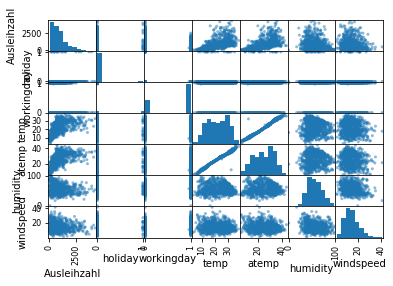

In [24]:
pd.plotting.scatter_matrix(df_slice3);

In [23]:
px.scatter_matrix(df_slice3)

In [31]:
df_slice3.columns

Index(['datetime', 'Ausleihzahl', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'clear_few_clouds', 'cloudy_mist',
       'heacy_rain_snow', 'light_snow_rain_thunderstorm'],
      dtype='object')

In [20]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Split data in Inputs (X) and outputs (Y)
X = df_slice3[['temp', 'atemp',
       'humidity', 'windspeed']]
# X = df[df.columns.difference(['y','article'])] # alle Spalten außer 'y' und 'article'
Y = df_slice3['Ausleihzahl'] 

In [52]:
# Scale X (to mean 0) and std 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) # with_mean=False: dont rescale the means to being all zero
Xs = pd.DataFrame(scaler.fit_transform(X[X.columns]))
Xs.columns = X.columns

In [53]:
regr = linear_model.LinearRegression()
regr.fit(Xs, Y)
pred = regr.predict(Xs)
print(Xs.columns.values)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('On Training set:')
print("Mean squared error: %.2f" % mean_squared_error(Y, pred))
print("Variance of target variable: %.2f" % np.var(Y))
print('Variance explained: %.2f' % r2_score(Y, pred))

['temp' 'atemp' 'humidity' 'windspeed']
Coefficients: 
 [ 0.04156945  0.20839459 -0.22685055  0.00674661]
Intercept: 
 1.7375106229141426
On Training set:
Mean squared error: 1.90
Variance of target variable: 2.02
Variance explained: 0.06


In [54]:
import statsmodels.api as sm
# This linear model does not use a constant, i.e. only y = a1*x1 + ... + an*xn , and NOT y = a1*x1 + ... + an*xn + c,
# However, if one adds a column to X with only 1's, then the coefficient of this column has the same effect as the intercept c above
Xsdqe = sm.add_constant(Xs)

# Learn the "Ordinary Least Squares" model
est = sm.OLS(Y, Xsdqe) # Create the object and hand it the data
est = est.fit() # Let it compute the regression coefficients
print(est.summary()) # show the results - including all sorts of metrics

ValueError: The indices for endog and exog are not aligned

In [18]:
import scipy.stats.shapiro

ModuleNotFoundError: No module named 'scipy.stats.shapiro'

In [ ]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [63]:
df_sclice4= df_slice2[(df_slice2.holiday==1)&(df_slice2.windspeed>35)].copy()

In [70]:
df_slice5 = df_sclice4.groupby(pd.Grouper(key="datetime",freq="min")).agg(Ausleihzahl=("registered_customer","count"),holiday=("holiday","mean"),workingday=("workingday","mean"),temp=("temp","mean"),atemp=("atemp","mean"),humidity=("humidity","mean"),windspeed=("windspeed","mean"),clear_few_clouds=("weather_clear, few clouds","mean"),cloudy_mist=("weather_cloudy, mist","mean"),heacy_rain_snow=("weather_heacy rain or thunderstorm or snow or ice pallets","mean"),light_snow_rain_thunderstorm=("weather_light snow or rain or thunderstorm","mean")).reset_index()

In [71]:
#df_slice5[df_slice5.temp.isna()]
df_slice5.dropna(inplace=True)

In [72]:
df_slice5

,datetime,Ausleihzahl,holiday,workingday,temp,atemp,humidity,windspeed,clear_few_clouds,cloudy_mist,heacy_rain_snow,light_snow_rain_thunderstorm
0,2020-09-07 22:04:00,1,1.0,0.0,24.60,27.275,88.0,39.0007,0.0,1.0,0.0,0.0
1,2020-09-07 22:05:00,1,1.0,0.0,24.60,27.275,88.0,39.0007,0.0,1.0,0.0,0.0
2,2020-09-07 22:06:00,1,1.0,0.0,24.60,27.275,88.0,39.0007,0.0,1.0,0.0,0.0
3,2020-09-07 22:07:00,1,1.0,0.0,24.60,27.275,88.0,39.0007,0.0,1.0,0.0,0.0
17,2020-09-07 22:21:00,1,1.0,0.0,24.60,27.275,88.0,39.0007,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
160667,2020-12-28 11:51:00,1,1.0,0.0,13.94,14.395,46.0,39.0007,1.0,0.0,0.0,0.0
160669,2020-12-28 11:53:00,1,1.0,0.0,13.94,14.395,46.0,39.0007,1.0,0.0,0.0,0.0
160670,2020-12-28 11:54:00,1,1.0,0.0,13.94,14.395,46.0,39.0007,1.0,0.0,0.0,0.0
160673,2020-12-28 11:57:00,1,1.0,0.0,13.94,14.395,46.0,39.0007,1.0,0.0,0.0,0.0


In [73]:
# Split data in Inputs (X) and outputs (Y)
X = df_slice5[['temp', 'atemp',
       'humidity', 'windspeed']]
# X = df[df.columns.difference(['y','article'])] # alle Spalten außer 'y' und 'article'
Y = df_slice5['Ausleihzahl'] 

In [74]:
# Scale X (to mean 0) and std 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) # with_mean=False: dont rescale the means to being all zero
Xs = pd.DataFrame(scaler.fit_transform(X[X.columns]))
Xs.columns = X.columns

In [75]:
regr = linear_model.LinearRegression()
regr.fit(Xs, Y)
pred = regr.predict(Xs)
print(Xs.columns.values)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('On Training set:')
print("Mean squared error: %.2f" % mean_squared_error(Y, pred))
print("Variance of target variable: %.2f" % np.var(Y))
print('Variance explained: %.2f' % r2_score(Y, pred))

['temp' 'atemp' 'humidity' 'windspeed']
Coefficients: 
 [-1.83833963  1.19194204  0.80104009 -0.12735124]
Intercept: 
 5.84455821957891
On Training set:
Mean squared error: 0.38
Variance of target variable: 0.40
Variance explained: 0.03
